Exploratory Data Analysis

In [1]:
import pandas as pd

file_path = '/content/realistic_customer_churn_dataset.csv'
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   object 
 1   Age                 1000 non-null   int64  
 2   Gender              1000 non-null   object 
 3   Income              1000 non-null   int64  
 4   Location            1000 non-null   object 
 5   MonthlySpend        1000 non-null   float64
 6   ContractType        1000 non-null   object 
 7   PaymentMethod       1000 non-null   object 
 8   TenureMonths        1000 non-null   int64  
 9   NumSupportTickets   1000 non-null   int64  
 10  RecentActivityDays  1000 non-null   int64  
 11  ServiceUsed         1000 non-null   object 
 12  NumDevices          1000 non-null   int64  
 13  DataUsageGB         1000 non-null   float64
 14  Churn               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
mem

In [2]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
CustomerID            0
Age                   0
Gender                0
Income                0
Location              0
MonthlySpend          0
ContractType          0
PaymentMethod         0
TenureMonths          0
NumSupportTickets     0
RecentActivityDays    0
ServiceUsed           0
NumDevices            0
DataUsageGB           0
Churn                 0
dtype: int64


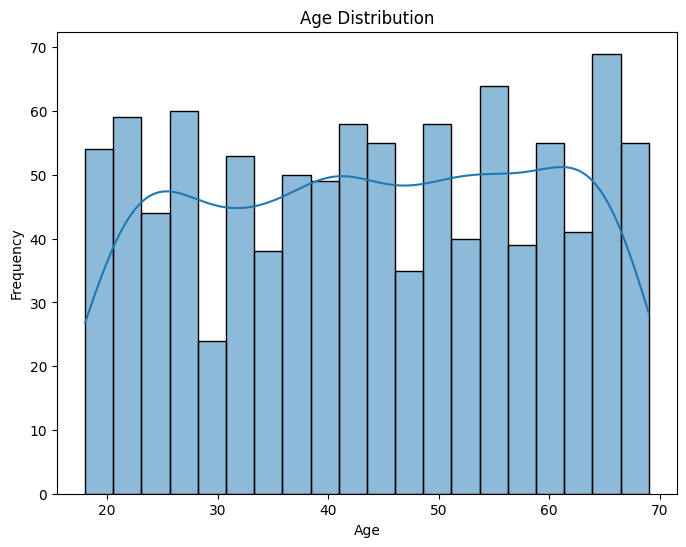

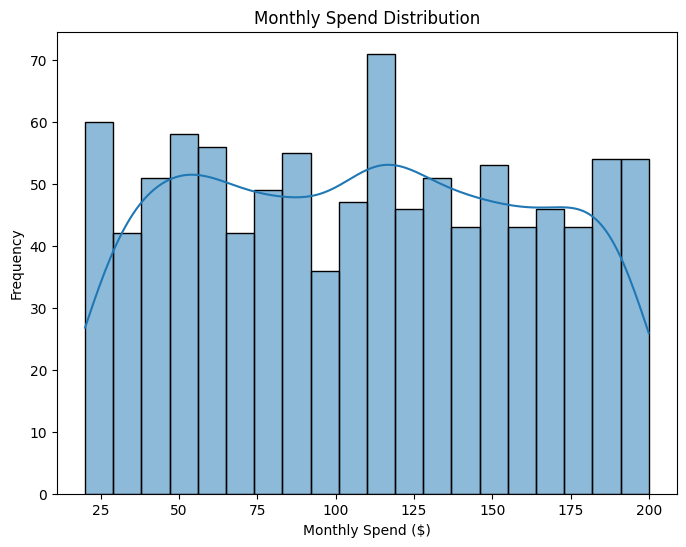

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlySpend'], kde=True, bins=20)
plt.title('Monthly Spend Distribution')
plt.xlabel('Monthly Spend ($)')
plt.ylabel('Frequency')
plt.show()


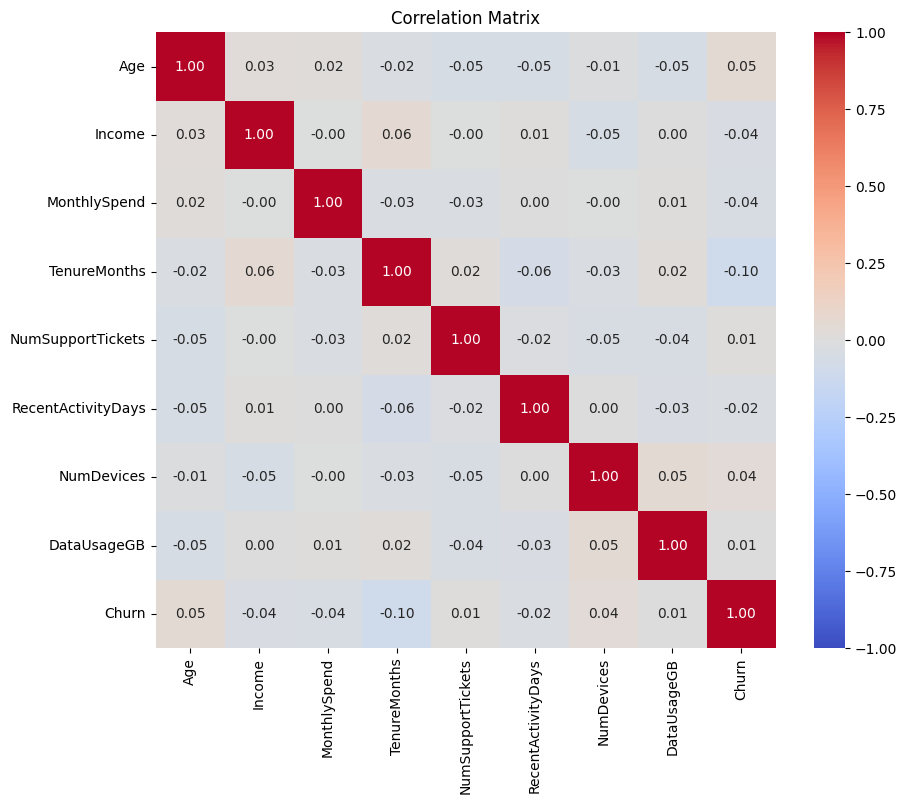

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



<ipython-input-8-ec241a245485>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


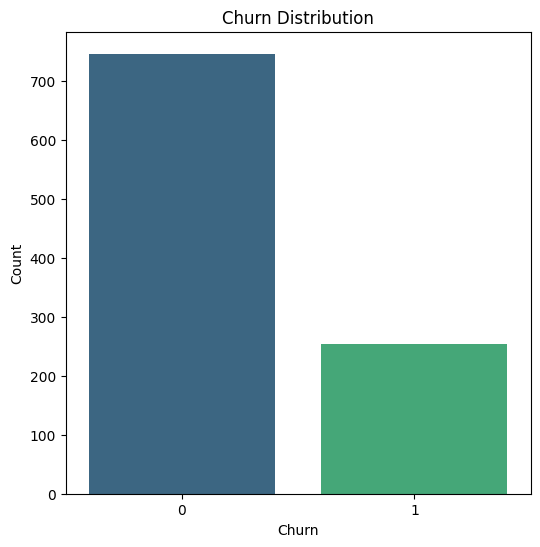

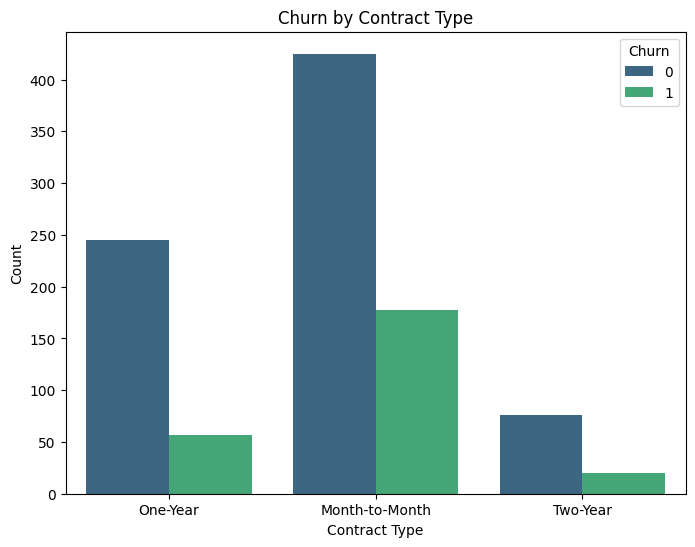

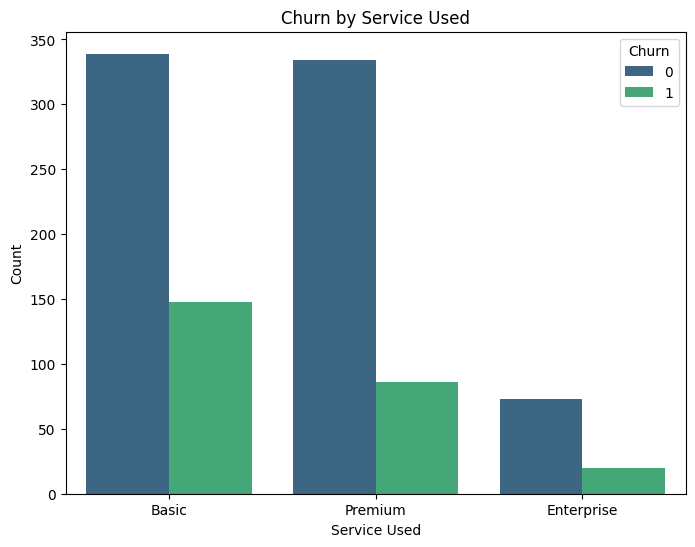

In [8]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ContractType', hue='Churn', palette='viridis')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ServiceUsed', hue='Churn', palette='viridis')
plt.title('Churn by Service Used')
plt.xlabel('Service Used')
plt.ylabel('Count')
plt.show()


Data Preprocessing

In [9]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location', 'ContractType', 'PaymentMethod', 'ServiceUsed'], drop_first=True)

print(df_encoded.head())


  CustomerID  Age  Income  MonthlySpend  TenureMonths  NumSupportTickets  \
0   893508c3   22   90805        180.32            36                  0   
1   98b5fe87   25   49158        127.55            11                  2   
2   d9b8c864   59   36914        166.29            21                  3   
3   52deae51   28   97204         64.03            57                  7   
4   19b030dc   56   38781        184.83            54                  5   

   RecentActivityDays  NumDevices  DataUsageGB  Churn  Gender_Male  \
0                  27           1        70.26      0        False   
1                  17           2        76.04      0         True   
2                  28           5        97.83      0         True   
3                   0           2        46.00      0         True   
4                  27           3        16.52      0        False   

   Location_Suburban  Location_Urban  ContractType_One-Year  \
0              False            True                   True

In [10]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['Age', 'Income', 'MonthlySpend', 'TenureMonths', 'NumSupportTickets', 'RecentActivityDays', 'NumDevices', 'DataUsageGB']


scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


print(df_encoded.head())


  CustomerID       Age    Income  MonthlySpend  TenureMonths  \
0   893508c3 -1.453540  0.673899      1.363761      0.361289   
1   98b5fe87 -1.254959 -0.781117      0.356065     -1.109998   
2   d9b8c864  0.995614 -1.208884      1.095844     -0.521483   
3   52deae51 -1.056379  0.897460     -0.856912      1.597170   
4   19b030dc  0.797034 -1.143657      1.449883      1.420616   

   NumSupportTickets  RecentActivityDays  NumDevices  DataUsageGB  Churn  \
0          -1.564564            1.456919   -1.398127     0.695864      0   
1          -0.863594            0.306750   -0.691288     0.901616      0   
2          -0.513110            1.571936    1.429228     1.677278      0   
3           0.888829           -1.648538   -0.691288    -0.167723      0   
4           0.187860            1.456919    0.015550    -1.217127      0   

   Gender_Male  Location_Suburban  Location_Urban  ContractType_One-Year  \
0        False              False            True                   True   
1     

In [11]:
df_encoded.drop(['CustomerID'], axis=1, inplace=True)

Machine Learning

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (700, 18) (700,)
Testing Set Shape: (300, 18) (300,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       224
           1       0.67      0.03      0.05        76

    accuracy                           0.75       300
   macro avg       0.71      0.51      0.45       300
weighted avg       0.73      0.75      0.65       300

Confusion Matrix:
[[223   1]
 [ 74   2]]


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86       224
           1       0.60      0.04      0.07        76

    accuracy                           0.75       300
   macro avg       0.68      0.52      0.46       300
weighted avg       0.71      0.75      0.66       300

Confusion Matrix:
[[222   2]
 [ 73   3]]


In [15]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:30:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       224
           1       0.34      0.21      0.26        76

    accuracy                           0.70       300
   macro avg       0.55      0.54      0.53       300
weighted avg       0.66      0.70      0.67       300

Confusion Matrix:
[[193  31]
 [ 60  16]]


Addressing Imbalance

In [16]:
!pip install imbalanced-learn


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [18]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class Distribution Before SMOTE:", y_train.value_counts())
print("Class Distribution After SMOTE:", pd.Series(y_train_balanced).value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class Distribution Before SMOTE: Churn
0    522
1    178
Name: count, dtype: int64
Class Distribution After SMOTE: Churn
0    522
1    522
Name: count, dtype: int64


In [19]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_balanced, y_train_balanced)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Performance (Balanced):")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Performance (Balanced):
              precision    recall  f1-score   support

           0       0.76      0.56      0.64       224
           1       0.27      0.47      0.34        76

    accuracy                           0.54       300
   macro avg       0.51      0.52      0.49       300
weighted avg       0.63      0.54      0.57       300

Confusion Matrix:
[[125  99]
 [ 40  36]]


In [20]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance (Balanced):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance (Balanced):
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       224
           1       0.38      0.22      0.28        76

    accuracy                           0.71       300
   macro avg       0.57      0.55      0.55       300
weighted avg       0.67      0.71      0.68       300

Confusion Matrix:
[[196  28]
 [ 59  17]]


In [21]:

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_balanced, y_train_balanced)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance (Balanced):")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Performance (Balanced):
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       224
           1       0.32      0.24      0.27        76

    accuracy                           0.68       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.65      0.68      0.66       300

Confusion Matrix:
[[185  39]
 [ 58  18]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:36:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Model

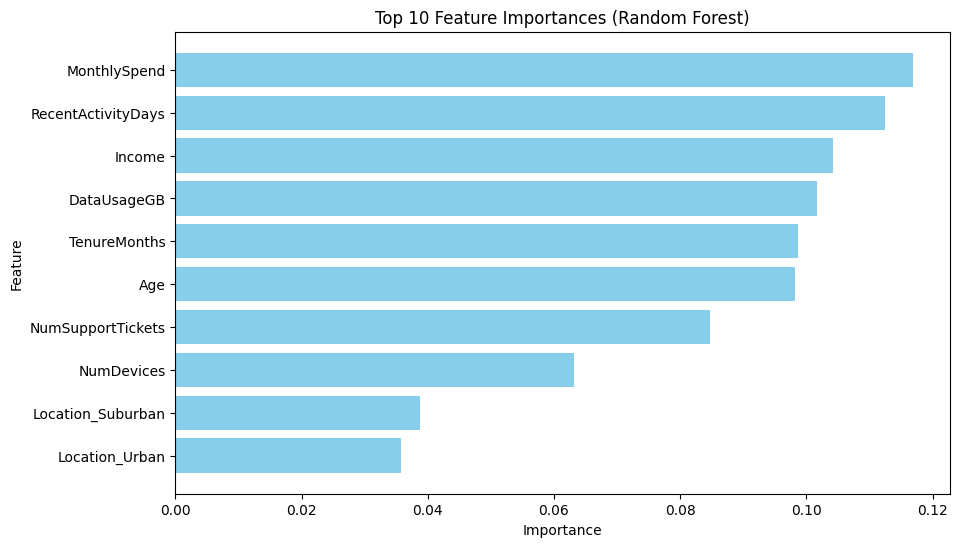

                      Feature  Importance
2                MonthlySpend    0.116944
5          RecentActivityDays    0.112494
1                      Income    0.104174
7                 DataUsageGB    0.101711
3                TenureMonths    0.098686
0                         Age    0.098217
4           NumSupportTickets    0.084777
6                  NumDevices    0.063217
9           Location_Suburban    0.038767
10             Location_Urban    0.035747
14  PaymentMethod_Credit Card    0.027290
15       PaymentMethod_PayPal    0.022817
13      PaymentMethod_Bitcoin    0.021574
8                 Gender_Male    0.020361
17        ServiceUsed_Premium    0.017242
11      ContractType_One-Year    0.016540
16     ServiceUsed_Enterprise    0.011374
12      ContractType_Two-Year    0.008068


In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

feature_importance = rf.feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1], color='skyblue')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(importance_df)
